In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import itertools
import time
import pickle 

import ipywidgets as widgets
from ipywidgets import interact

# Default plotting parameters
plt.rcParams.update({
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'axes.labelsize': 20,
    'axes.titlesize': 25,
})

In [2]:
def measure_statistics(A):
    
    N = A.shape[0]
    
    p = np.sum(A)/(N*(N-1))

    N_recip = np.trace(np.dot(A, A))/2  
    N_conv = (np.sum(np.dot(A, A.T)) - np.sum(A))/2 # reversed; high indegree variance
    N_div = (np.sum(np.dot(A.T, A)) - np.sum(A))/2 #reversed; high outdegree variances
    N_chain = (np.sum(np.dot(A, A)) - np.trace(np.dot(A, A)))

    alpha_recip = (N_recip/( (np.power(p,2)*N*(N-1))/2 )) - 1
    alpha_conv = (N_conv/( (np.power(p,2)*N*(N-1)*(N-2))/2 )) - 1
    alpha_div = (N_div/( (np.power(p,2)*N*(N-1)*(N-2))/2 )) - 1
    alpha_chain = (N_chain/( np.power(p,2)*N*(N-1)*(N-2) ) ) - 1

    return np.array([p,alpha_recip,alpha_conv,alpha_div,alpha_chain])

In [3]:
def update_plot(PC_sample_index):
    with open("Connectivity_Matrices/Oct_13_all_weights_mat_specific_V2_250.pkl", 'rb') as file:
        M = pickle.load(file)[int(PC_sample_index), :, :]
    
    second_order_metrics = measure_statistics(M.astype(np.float64))
    second_ord_stats_names = np.array(['p', 'R', 'C', 'D', 'Ch'])
    
    # Create the network statistics description
    net_stats_description = (f"{'; '.join(f'{name} = {value:.2f}' for name, value in zip(second_ord_stats_names[1:], second_order_metrics[1:]))}")
    
    # Plot the matrix with title and labels
    plt.figure(figsize=(5, 5))
    plt.title(net_stats_description, fontsize=15)
    plt.xticks([]); plt.yticks([]);
    plt.imshow(M, cmap='Blues', interpolation='none')
    #plt.xlabel('Target Neuron Index', fontsize=15)
    #plt.ylabel('Source Neuron Index', fontsize=15)
    plt.show()

# Create an interactive slider using ipywidgets
interact(update_plot, PC_sample_index=widgets.IntSlider(value=0, min=0, max=30, step=1, description='PC Sample Index'))

interactive(children=(IntSlider(value=0, description='PC Sample Index', max=30), Output()), _dom_classes=('wid…

<function __main__.update_plot(PC_sample_index)>

In [4]:
with open("Connectivity_Matrices/Oct_13_all_weights_mat_specific_V2_1000.pkl", 'rb') as file:
    M = pickle.load(file)

MemoryError: 

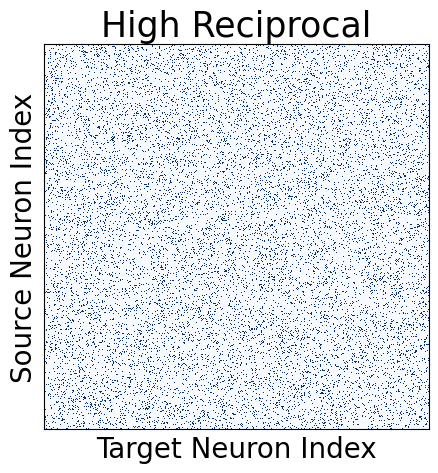

In [ ]:
plt.figure(figsize=(5, 5))
plt.title('High Reciprocal', fontsize=25)
plt.imshow(M[2,:,:], cmap='Blues', interpolation='none')
plt.xticks([]); plt.yticks([]);
plt.xlabel('Target Neuron Index', fontsize=20)
plt.ylabel('Source Neuron Index', fontsize=20)
plt.show()

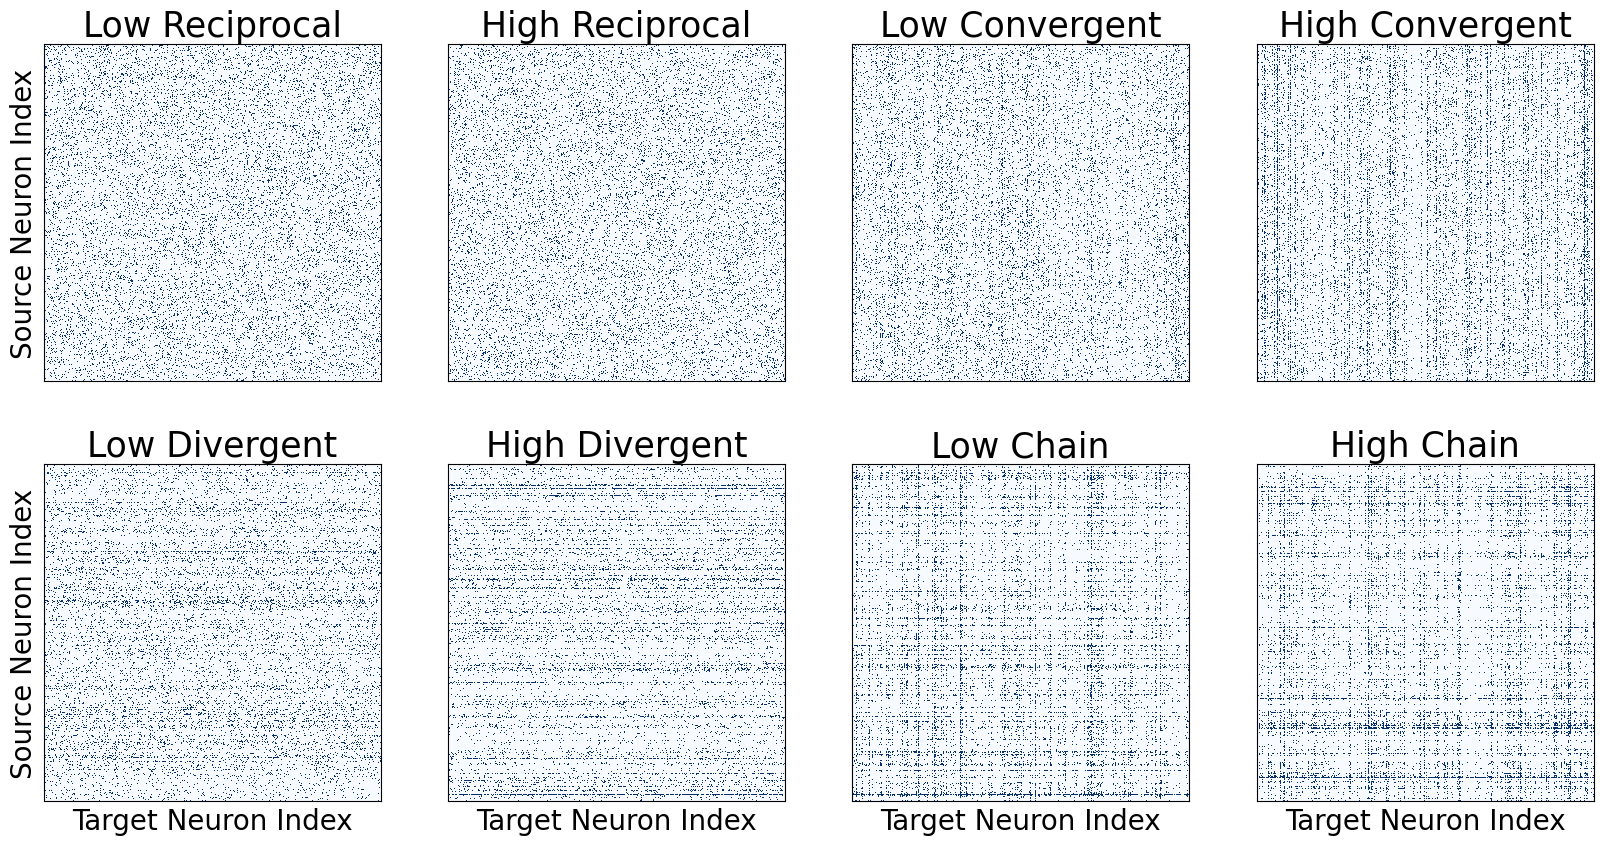

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

# Indices of the matrices to plot
matrices_to_plot = [M[1], M[2], M[3], M[4], M[5], M[6], M[7], M[9]]
matrices_titles = ['Low Reciprocal','High Reciprocal','Low Convergent','High Convergent','Low Divergent','High Divergent','Low Chain','High Chain']

# Loop through each subplot
for i, ax in enumerate(axes.flat):
    # Display the matrix in each subplot
    ax.imshow(matrices_to_plot[i], cmap='Blues', interpolation='none')
    
    # Remove titles (keep them blank for later setting)
    ax.set_title(matrices_titles[i], fontsize=25)
    
    # Turn off ticks for all axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set labels only for specific subplots
    if i >= 4:  # Bottom row
        ax.set_xlabel('Target Neuron Index', fontsize=20)
    if i % 4 == 0:  # Left-most column
        ax.set_ylabel('Source Neuron Index', fontsize=20)

# plt.tight_layout
# #plt.savefig("Paper Figures/example_matrix_plots.pdf", format='pdf', bbox_inches='tight')
# plt.show()
#now target is on y axis